In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [3]:
df = pd.read_csv('data/clustered_data.csv')
df.head()

,Unnamed: 0,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,...,Geocode,Occupation,Travel History,Relationship with other patients,Remarks,Cluster,Combined Address,latitude,longitude,cluster_label
0,0,1,23/1/2020,21/1/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.3415435, 114.1338324)",NaN,NaN,NaN,NaN,NaN,Princess Margaret Hospital Kwai Tsing Hong Kong,22.341544,114.133832,1
1,1,2,23/1/2020,18/1/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,...,"(22.4151657, 114.2230053)",NaN,NaN,NaN,NaN,NaN,"Tower 1A, Oceanaire Shatin Hong Kong",22.415166,114.223005,0
2,2,3,24/1/2020,20/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.412407, 113.9837095)",NaN,NaN,NaN,NaN,NaN,South Hillcrest Tuen Mun Hong Kong,22.412407,113.983710,2
3,3,4,24/1/2020,23/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.428605, 114.2430898)",NaN,NaN,NaN,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0
4,4,5,24/1/2020,23/1/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.428605, 114.2430898)",NaN,NaN,NaN,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0


In [4]:
ef = pd.read_excel('data/additional_info_raw.xlsx')
ef.head()

,Occupation,Travel History,Relationship with other patients,Remarks
0,-,Wuhan,-,NaN
1,-,Wuhan,-,NaN
2,-,Wuhan,wife of #8,NaN
3,-,Wuhan,wife of #5,NaN
4,-,Wuhan,husband of #4,NaN


In [5]:
clustered_data = df.merge(ef, left_index = True, right_index= True)
clustered_data.head()

,Unnamed: 0,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,...,Remarks_x,Cluster,Combined Address,latitude,longitude,cluster_label,Occupation_y,Travel History_y,Relationship with other patients_y,Remarks_y
0,0,1,23/1/2020,21/1/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,NaN,NaN,Princess Margaret Hospital Kwai Tsing Hong Kong,22.341544,114.133832,1,-,Wuhan,-,NaN
1,1,2,23/1/2020,18/1/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,...,NaN,NaN,"Tower 1A, Oceanaire Shatin Hong Kong",22.415166,114.223005,0,-,Wuhan,-,NaN
2,2,3,24/1/2020,20/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,NaN,NaN,South Hillcrest Tuen Mun Hong Kong,22.412407,113.983710,2,-,Wuhan,wife of #8,NaN
3,3,4,24/1/2020,23/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0,-,Wuhan,wife of #5,NaN
4,4,5,24/1/2020,23/1/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0,-,Wuhan,husband of #4,NaN


In [11]:
new_data = clustered_data.drop(columns = ['Unnamed: 0', 'Occupation_x','Travel History_x', 'Relationship with other patients_x','Remarks_x'])
new_data.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,...,Geocode,Cluster,Combined Address,latitude,longitude,cluster_label,Occupation_y,Travel History_y,Relationship with other patients_y,Remarks_y
0,1,23/1/2020,21/1/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.3415435, 114.1338324)",NaN,Princess Margaret Hospital Kwai Tsing Hong Kong,22.341544,114.133832,1,-,Wuhan,-,NaN
1,2,23/1/2020,18/1/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,Confirmed,...,"(22.4151657, 114.2230053)",NaN,"Tower 1A, Oceanaire Shatin Hong Kong",22.415166,114.223005,0,-,Wuhan,-,NaN
2,3,24/1/2020,20/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.412407, 113.9837095)",NaN,South Hillcrest Tuen Mun Hong Kong,22.412407,113.983710,2,-,Wuhan,wife of #8,NaN
3,4,24/1/2020,23/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.428605, 114.2430898)",NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0,-,Wuhan,wife of #5,NaN
4,5,24/1/2020,23/1/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.428605, 114.2430898)",NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0,-,Wuhan,husband of #4,NaN


In [18]:
for col in new_data.columns: 
    print(col)

Case no.
Report date
Date of onset
Gender
Age
Name of hospital admitted
Hospitalised/Discharged/Deceased
HK/Non-HK resident
Case classification*
Confirmed/probable
Residence
Area of Residence
Geocode
Cluster
Combined Address
latitude
longitude
cluster_label
Occupation_y
Travel History_y
Relationship with other patients_y
Remarks_y


In [19]:
new_data.rename(columns={'Occupation_y':'Occupation','Travel History_y': 'Travel_History','Relationship with other patients_y': 'Relationship','Remarks_y': 'Remarks' }, inplace=True)
new_data.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,...,Geocode,Cluster,Combined Address,latitude,longitude,cluster_label,Occupation,Travel_History,Relationship,Remarks
0,1,23/1/2020,21/1/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.3415435, 114.1338324)",NaN,Princess Margaret Hospital Kwai Tsing Hong Kong,22.341544,114.133832,1,-,Wuhan,-,NaN
1,2,23/1/2020,18/1/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,Confirmed,...,"(22.4151657, 114.2230053)",NaN,"Tower 1A, Oceanaire Shatin Hong Kong",22.415166,114.223005,0,-,Wuhan,-,NaN
2,3,24/1/2020,20/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.412407, 113.9837095)",NaN,South Hillcrest Tuen Mun Hong Kong,22.412407,113.983710,2,-,Wuhan,wife of #8,NaN
3,4,24/1/2020,23/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.428605, 114.2430898)",NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0,-,Wuhan,wife of #5,NaN
4,5,24/1/2020,23/1/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed,...,"(22.428605, 114.2430898)",NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0,-,Wuhan,husband of #4,NaN


In [20]:
new_data.to_csv ('clustered_data.csv', index=None, header = True)

In [21]:
# Check all the unique Occupations
new_data.Occupation.unique() 

array(['-', 'cashier', 'work at "Fresh Up"', 'cleaner at Wanchai',
       'work in Peking Garden', nan, 'engineer', 'urban taxi driver',
       'security guard', 'housewife', 'cleaner',
       'Monk, Director of Fook Wai Ching She', 'Domestic Helper',
       'Businessman', 'Personal Driver',
       'Employee of Food and Environmental Hygiene Department',
       'Cabin Crew', 'Tour Guide', 'Design Architect',
       'Citybus bus driver', 'Tourist', 'Private Driver', 'Student',
       'Online Tutor', 'Flight Attendant', 'Athlete', 'Travel Agent',
       'School Adminstration Officer', 'Reporter', 'taxi driver',
       'domestic helper', 'musician', 'staff for Kelly Mount School',
       'staff for Kelly Mount School Hong Kong',
       'flight attendant of Cathay Pacific', 'doctor', 'Policewoman',
       'Bartender', 'Studnet', 'Nurse', 'Musician',
       'Staff at Selvedge Central hair salon',
       'Staff Member at Insomnia Bar', 'Bar Performer',
       'Staff Member at Dusk Till Dawn'

In [29]:
# Check all the unique Travel History
occupation = new_data.Occupation 

In [30]:
#number of students
student = 0
for i in occupation:
    if i == 'Student' or i == 'student':
        student +=1
print(student)

194


In [34]:
#number of values provided
count = 0
for i in occupation:
    if i == '-' or i == '':
        continue
    count +=1
print(count)

674


In [2]:
sector = pd.read_excel('data/sector.xlsx', nrows = 937)
sector

,Sector
0,Finance/Banking
1,Logistics
2,Cleaner
3,Finance/Banking
4,Cleaner
...,...
268,Shopping Teller
269,Shopping Teller
270,Student
271,Shopping Teller


In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
text = sector['Sector'].tolist()
str_txt = ""
for i in text:
        str_txt = str_txt + " " + i

In [5]:
import matplotlib as mpl
dpi = 150
mpl.rcParams['figure.dpi']= dpi

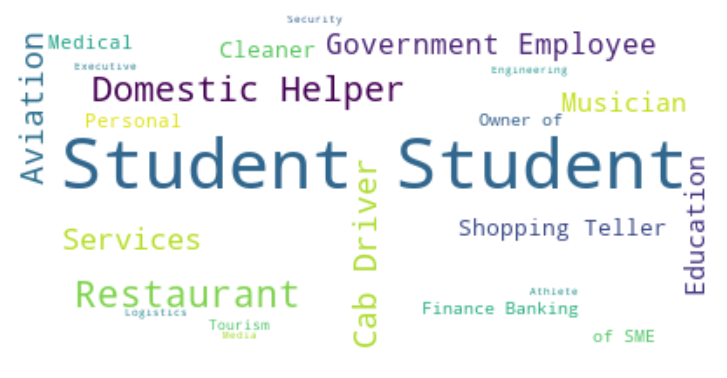

In [6]:
wordcloud = WordCloud(max_font_size=40, max_words=300, background_color="white").generate(str_txt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
sector['Sector'].value_counts()

Student                192
Restaurant              11
Domestic Helper         10
Cab Driver               8
Aviation                 8
Government Employee      6
Education                5
Musician                 5
Shopping Teller          4
Cleaner                  4
Finance/Banking          3
Owner of SME             3
Personal Services        3
Medical Services         3
Tourism                  2
Security Services        1
Executive                1
Media                    1
Engineering              1
Athlete                  1
Logistics                1
Name: Sector, dtype: int64